### This jupyter notebook is to unit-test CFE model run

## Preparation

In [22]:
# Import modules
import json
from bmi_cfe import BMI_CFE

In [23]:
# Input: Little Washita data for 12 yrs
# forcing: LittleWashita/little_washita_2006_2012.csv
# observed: test_sm_basinavg


# Parameter: only limited number of parameters
# 	Unnamed: 0	like1	parbb	parsatdk	parsatpsi	parslop	parsmcmax	parwltsmc	parmax_gw_storage	parCgw	parexpon	parK_nash	parrefkdt	partrigger_z_fact	paralpha_fc	parK_lf	parnum_nash_storage
# 2869	2869	0.178421	3.291205	0.616596	0.78	0.029422	0.894693	0.095967	53.201708	0.0015	6.410308	0.227507	9990.000000	0.75	0.1	0.996	20.86379


# 	Unnamed: 0	like1	parbb	parsatdk	parsatpsi	parslop	parsmcmax	parwltsmc	parmax_gw_storage	parCgw	parexpon	parK_nash	parrefkdt	partrigger_z_fact	paralpha_fc	parK_lf	parD	parnum_nash_storage
# 592	592	0.876861	1.272496	0.000367	0.484279	0.000072	0.29342	0.002927	225.240689	9.625560	5.012957	0.047537	9990.000000	0.649522	0.10847	0.234793	100.0	80.706118

# 	Unnamed: 0	like1	parbb	parsatdk	parsatpsi	parslop	parsmcmax	parwltsmc	parmax_gw_storage	parCgw	parexpon	parK_nash	parrefkdt	partrigger_z_fact	paralpha_fc	parK_lf	parD	parnum_nash_storage
# 1468	1468	0.242275	0.0546	0.100876	0.769738	0.031752	0.344641	0.048044	419.597873	3.171141	0.254816	0.407342	7688.784902	0.673953	0.185811	0.996	44.226973	5.62484

# 	Unnamed: 0	like1	parbb	parsatdk	parsatpsi	parslop	parsmcmax	parwltsmc	parmax_gw_storage	parCgw	parexpon	parK_nash	parrefkdt	partrigger_z_fact	paralpha_fc	parK_lf	parD	parnum_nash_storage
# 1471	1471	0.211987	8.990886	0.060442	0.638266	0.87453	0.948077	0.012942	497.91655	1.522687	0.945915	0.3	7048.340683	0.695436	0.150908	0.000424	97.296499	100.0

input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/LittleWashita/little_washita_2006_2012.csv", 
    "catchment_area_km2": 600, 
    "soil_params": {
        "bb": 2, 
        "satdk": 0.060442, 
        "satpsi": 0.638266, 
        "slop":1, 
        "smcmax": 0.948077, 
        "wltsmc": 	0.012942, 
        "D":97.296499
        }, 
        "max_gw_storage": 	497.91655, 
        "Cgw":0.1522687, 
        "expon": 0.09, 
        "K_nash":0.3, 
        "refkdt": 7048.340683, 
        "trigger_z_fact": 0.6, 
        "alpha_fc":0.150908, 
        "K_lf":	1, 
        "num_nash_storage": 100, 
        "giuh_ordinates": [0.0, 0.0, 0.0, 0.1, 0.2, 0.4, 0.2, 0.1], 
        "stand_alone": 1, 
        "unit_test": 1, 
        "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/LittleWashita/test_sm_basinavg.csv"
        }

with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

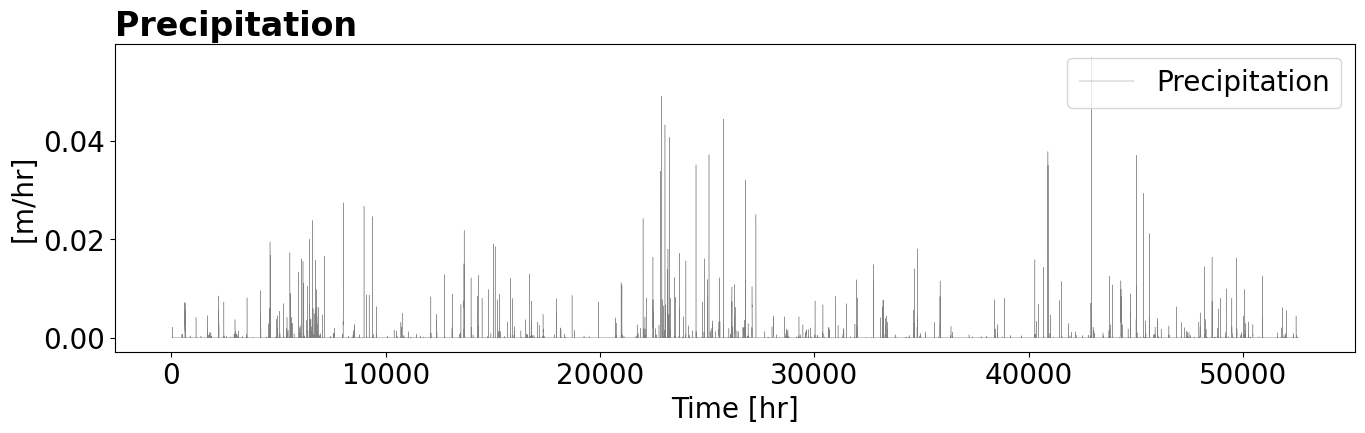

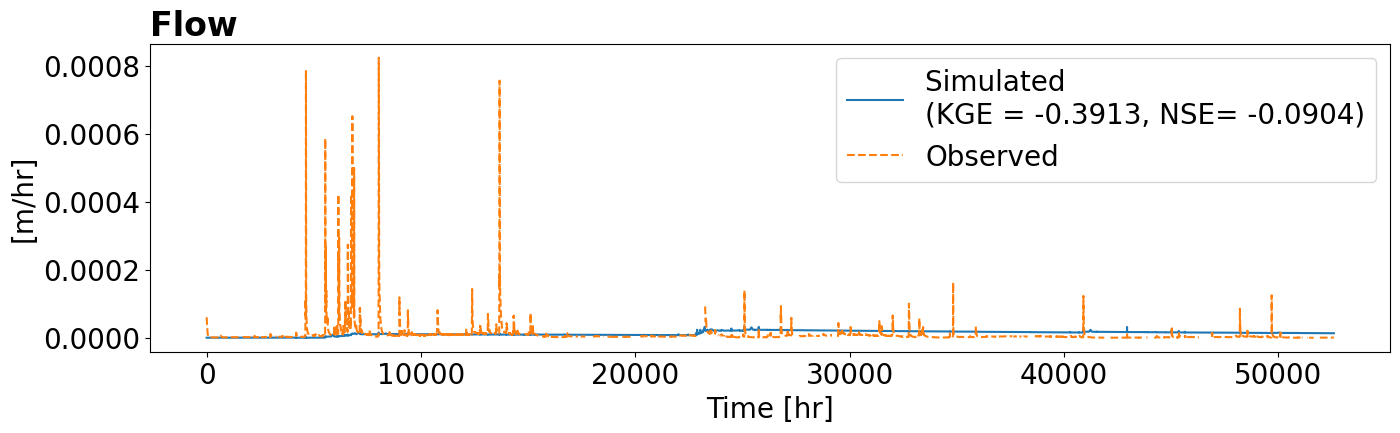

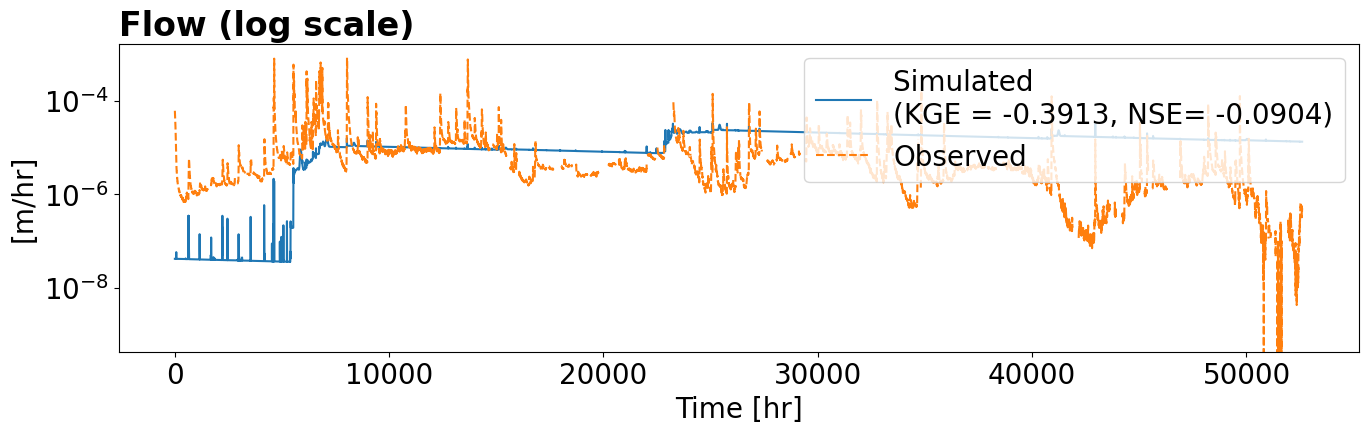

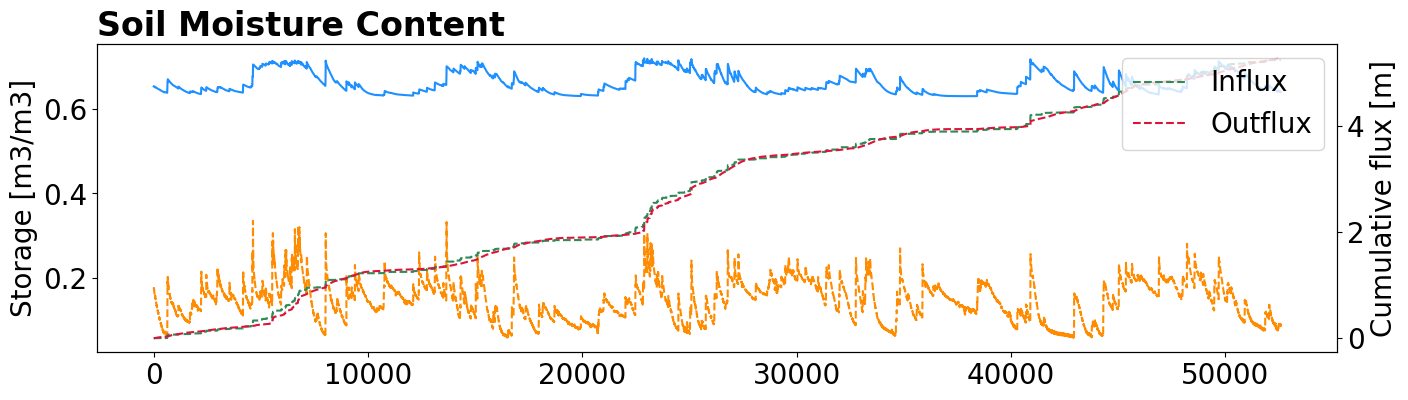

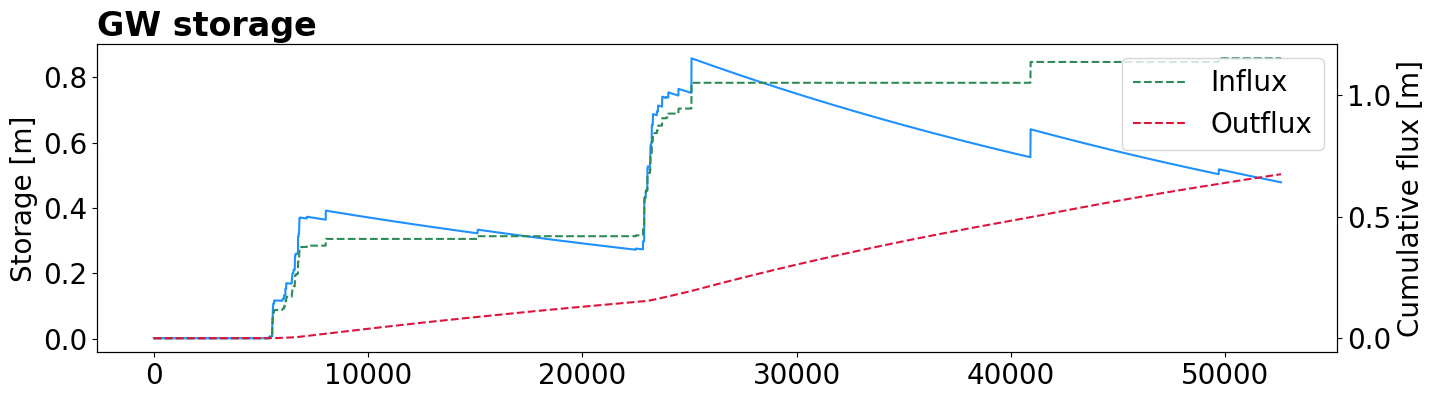

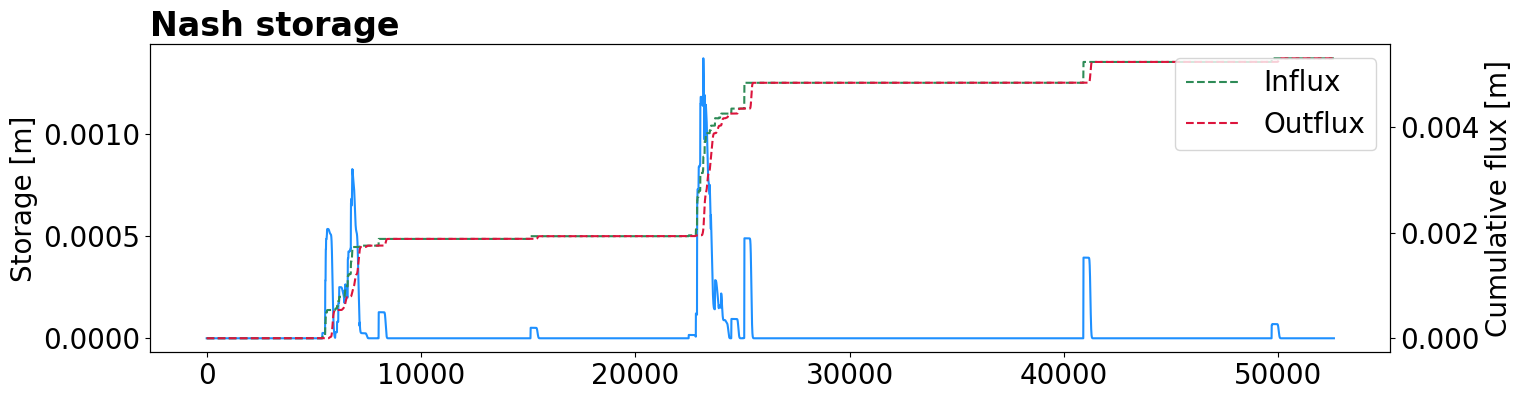

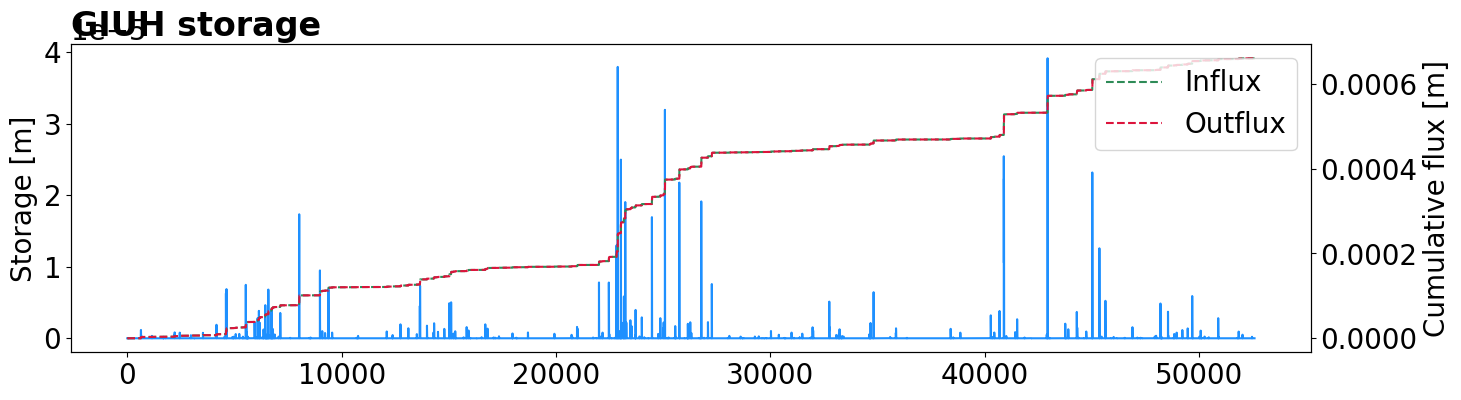


GLOBAL MASS BALANCE
      initial volume:  57.2616
        volume input:   5.9018
       volume output:   5.4538
        final volume:   1.7554
            residual: 5.5954e+01

 Discharge details
Cumulative discharge: 0.68
        Runoff ratio: 0.12
      Surface runoff: 0.00
  Deep GW to channel: 0.99
        Lateral flow: 0.01

 AET & PET
      volume PET:  14.4689
      volume AET:   4.7719
ET from rainfall:   0.6505
    ET from soil:   4.1214

SCHAAKE MASS BALANCE
    volume input:   5.9018
ET from rainfall:   0.6505
  surface runoff:   0.0007
             IOF:   0.0007
             SOF:   0.0000
    infiltration:   5.2507
schaake residual: -1.9540e-14

GIUH MASS BALANCE
  vol. into giuh:   0.0007
   vol. out giuh:   0.0007
 vol. end giuh q:   0.0000
   giuh residual: -9.7578e-19

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   1.3058
  vol. into soil:   5.2507
vol.soil2latflow:   0.0053
 vol. soil to gw:   1.1528
 vol. soil to ET:   4.1214
 final vol. soil:   1.

In [24]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(plot=True, print_fluxes=False, warm_up=True)
cfe_instance.finalize(print_mass_balance=True)